# Порогова обробка зображень

У даній лабораторній роботі розглянуто наступні приклади порогової обробки зображень:
1. Глобальна порогова обробка
2. Бінарізція методом Оцу
3. Порогова обробка з декількома порогами
4. Адаптивна порогова обробка зображень

### Імпортуємо необхдіні пакети та бібліотеки

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Зчитаємо та завантажимо вхідне чорно-біле зображення та відобразимо його.

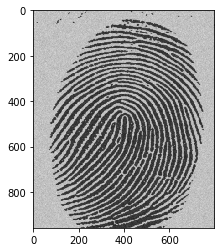

In [26]:
img = cv2.imread("./examples/Fig1038a.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255);
plt.show();

### Глобальна порогова обрбобка

Порогова обробка зображення - перетворення значень інтенсивності пікселів зображення  шляхом порівняння інтенсивності кожного пікселя  із заданим пороговим значенням та встановленням в задане значення інтенсивності.

Спочатку розглянемо бінарну порогову обробку. У даному випадку значення інтенсивності пікселів після порівняння з пороговим значенням встановлюється в одне з двух можливих значень інтенсивності (мініальне або максимальне).
Виконаємо  порогову обробку вхідного чорно-білого зображення з пороговим значенням **threshold = 127**, мінімальним значенням інтенсивності **min_val = 0**, максимальним значенням інтенсивності **max_val = 255**.

In [27]:
bin_img = img.copy()
threshold = 127
max_val = 255
min_val = 0

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if (img[row][col]) > threshold:
            bin_img[row][col] = max_val
        else:
            bin_img[row][col] = min_val

Відобразимо вихідне зображення після порогової обробки.

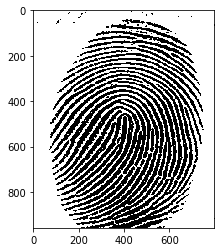

In [28]:
plt.imshow(bin_img, cmap = 'gray'); plt.show();

Для пороговї обробки зображення у OpenCV використовується функція **threshold**.

### Синтаксис функції
    retval, dst = cv2.threshold(src, thresh, maxval, type[, dst])
Параметри:
* **src** - вхідне зображення;<br>
* **thresh** - порогове значення;<br>
* **maxval** - максимальне значення;<br>
* **type** - тип порогової обробки:<br>  
    * cv2.THRESH_BINARY
    * cv2.THRESH_BINARY_INV
    * cv2.THRESH_TRUNC
    * cv2.THRESH_TOZERO
    * cv2.THRESH_TOZERO_INV
    <br>
<img src="./files/threshold_type.png">

Для глобальної порогової обробки за допомогою функції **threshold** необхідно передати параметр типу обробки **type=cv2.THRESH_BINARY**:

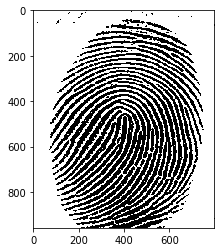

In [29]:
ret, thresh_bin = cv2.threshold(img, threshold, max_val, cv2.THRESH_BINARY)
plt.imshow(thresh_bin, cmap = 'gray'); plt.show();

Інший тип порогової обробки - зворотня глобальна порогова обробка. У даному випадку якщо значення інтенсивності пікселя більше заданого порогу **threshold = 127**, значення інтенсивності встановлюється у мінімальне значення **min_val = 0** у іншому разі значення інтенсивності встановлюється у максимальне значення **max_val = 255**.

In [30]:
bin_img_inv = img.copy()
threshold = 127
max_val = 255
min_val = 0

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if (img[row][col]) > threshold:
            bin_img_inv[row][col] = min_val
        else:
            bin_img_inv[row][col] = max_val

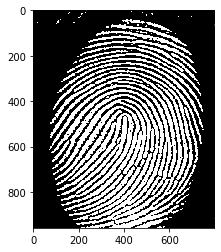

In [31]:
plt.imshow(bin_img_inv, cmap = 'gray'); plt.show();

Для зворотньої глобальної порогової обробки за допомогою функції threshold необхідно передати параметр типу обробки **type=cv2.THRESH_BINARY_INV**:

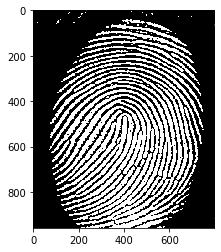

In [32]:
ret, thresh_bin_inv = cv2.threshold(img, threshold, max_val, cv2.THRESH_BINARY_INV)
plt.imshow(thresh_bin_inv, cmap = 'gray'); plt.show();

Наступні типи прогової обробки перетворюють значення інтенсивності пікселів в задане максимальне або мінімальне значення тільки якщо значення інтенсивності пікселя більше або меньше заданого порогу, у протилежному разі занчення інтенсивності залишається без змін.

Ще один тип глобальної порогової обробки - порогова обробка з обмеженням. У даному випадку якщо значення інтенсивності пікселя більше заданого порогу **threshold = 127**, значення інтенсивності встановлюється у порогове значення  **threshold = 127** у іншому разі значення інтенсивності залишається без змін.

In [41]:
img_trun = img.copy()
threshold = 127

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if (img[row][col]) > threshold:
            img_trun[row][col] = threshold
        else:
            img_trun[row][col] = img[row][col]

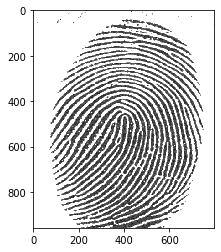

In [42]:
plt.imshow(img_trun, cmap = 'gray'); plt.show();

Для порогової обробки з обмеженням за допомогою функції threshold необхідно передати параметр типу обробки **type = cv2.THRESH_TRUNC**:

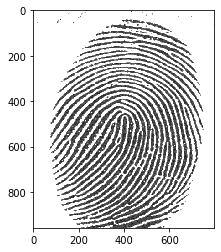

In [43]:
ret, thresh_trun = cv2.threshold(img, threshold, max_val, cv2.THRESH_TRUNC)
plt.imshow(thresh_trun, cmap = 'gray'); plt.show();

Ще один тип глобальної порогової обробки - порогова обробка до нуля. У даному випадку якщо значення інтенсивності пікселя менше заданого порогу **threshold = 127**, значення інтенсивності встановлюється у мінімальне значення **min_val = 0**, а у іншому разі значення інтенсивності залишається без змін.

In [44]:
img_zero = img.copy()
threshold = 127
min_val = 0

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if (img[row][col]) > threshold:
            img_zero[row][col] = img[row][col]
        else:
            bin_img_zero[row][col] = min_val

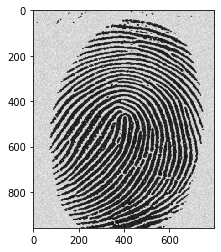

In [45]:
plt.imshow(img_zero, cmap = 'gray'); plt.show();

Для порогової обробки до нуля за допомогою функції threshold необхідно передати параметр типу обробки **type = cv2.THRESH_TOZERO**:

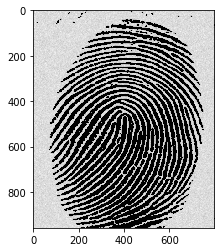

In [46]:
ret, thresh_zero = cv2.threshold(img, threshold, max_val, cv2.THRESH_TOZERO)
plt.imshow(thresh_bin_zero, cmap = 'gray'); plt.show();

Ще один тип глобальної порогової обробки - зворотня порогова обробка до нуля. У даному випадку якщо значення інтенсивності пікселя більше заданого порогу **threshold = 127**, значення інтенсивності встановлюється у мінімальне значення **min_val = 0**, а у іншому разі значення інтенсивності залишається без змін.

In [47]:
img_zero_inv = img.copy()
threshold = 127
min_val = 0

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        if (img[row][col]) > threshold:
            img_zero_inv[row][col] = min_val
        else:
            img_zero_inv[row][col] = img[row][col]

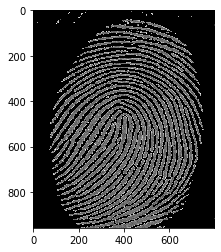

In [48]:
plt.imshow(img_zero_inv, cmap = 'gray'); plt.show();

Для порогової обробки до нуля за допомогою функції threshold необхідно передати параметр типу обробки **type = cv2.THRESH_TOZERO_INV**:

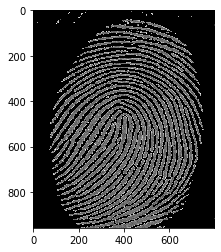

In [49]:
ret, thresh_zero_inv = cv2.threshold(img, threshold, max_val, cv2.THRESH_TOZERO_INV)
plt.imshow(thresh_zero_inv, cmap = 'gray'); plt.show();

Для наглядності продемонструємо всі типи порогової обробки функції **cv2.threshold** на  зображенні градієнту відтінків сірого в діапазоні значеннь інтенсивності пікселів від 0 до 255.

Зчитаємо вхідне зображення.

In [50]:
img = cv2.imread('./examples/gradient.jpeg', cv2.IMREAD_GRAYSCALE)

Виконаємо порогову обробку з приведеними вище типами обробки.

In [51]:
min_val = 0
threshold = 127
max_val = 255
ret,thresh1 = cv2.threshold(img, threshold, max_val, cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img, threshold, max_val, cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img, threshold, max_val, cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img, threshold, max_val, cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img, threshold, max_val, cv2.THRESH_TOZERO_INV)

Відобразимо вхідне зображення та вихідні зображення після порогової обробки.

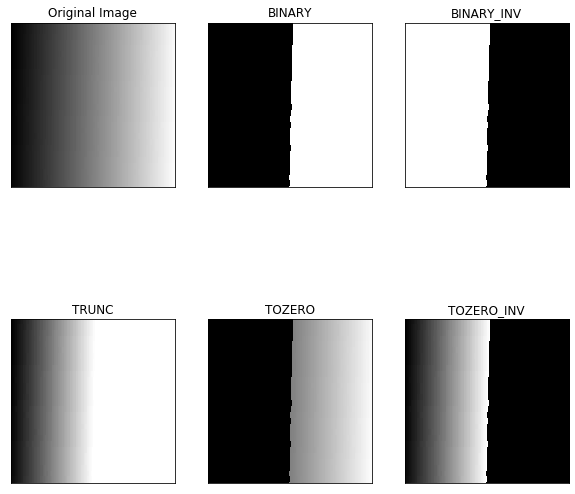

In [53]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Бінарізція методом Оцу

It automatically calculates a threshold value from image histogram for a bimodal image. 

For this, cv2.threshold() function is used, but pass an extra flag, cv2.THRESH_OTSU. For threshold value, simply pass zero. Then the algorithm finds the optimal threshold value and returns you as the second output, <b><i>retVal</i></b>. If Otsu thresholding is not used, retVal is same as the threshold value you used.

Check out below example. Input image is a noisy image. In first case, we applied global thresholding for a value of 127. In second case, we applied Otsu’s thresholding directly. In third case, we filtered image with a 5x5 gaussian kernel to remove the noise, then applied Otsu thresholding. See how noise filtering improves the result.

Зчитаємо та завантажимо вхідне чорно-біле зображення та відобразимо його.

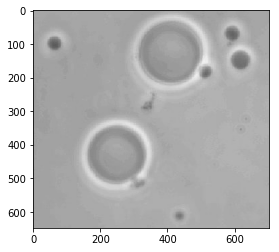

In [8]:
img = cv2.imread('./examples/Fig1039a.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255);
plt.show();

<h4>Global thresholding</h4>

In [9]:
ret1,th1 = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY)

<h4>Otsu's thresholding</h4>

In [128]:
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

<h4>Plot all the images and their histograms</h4>

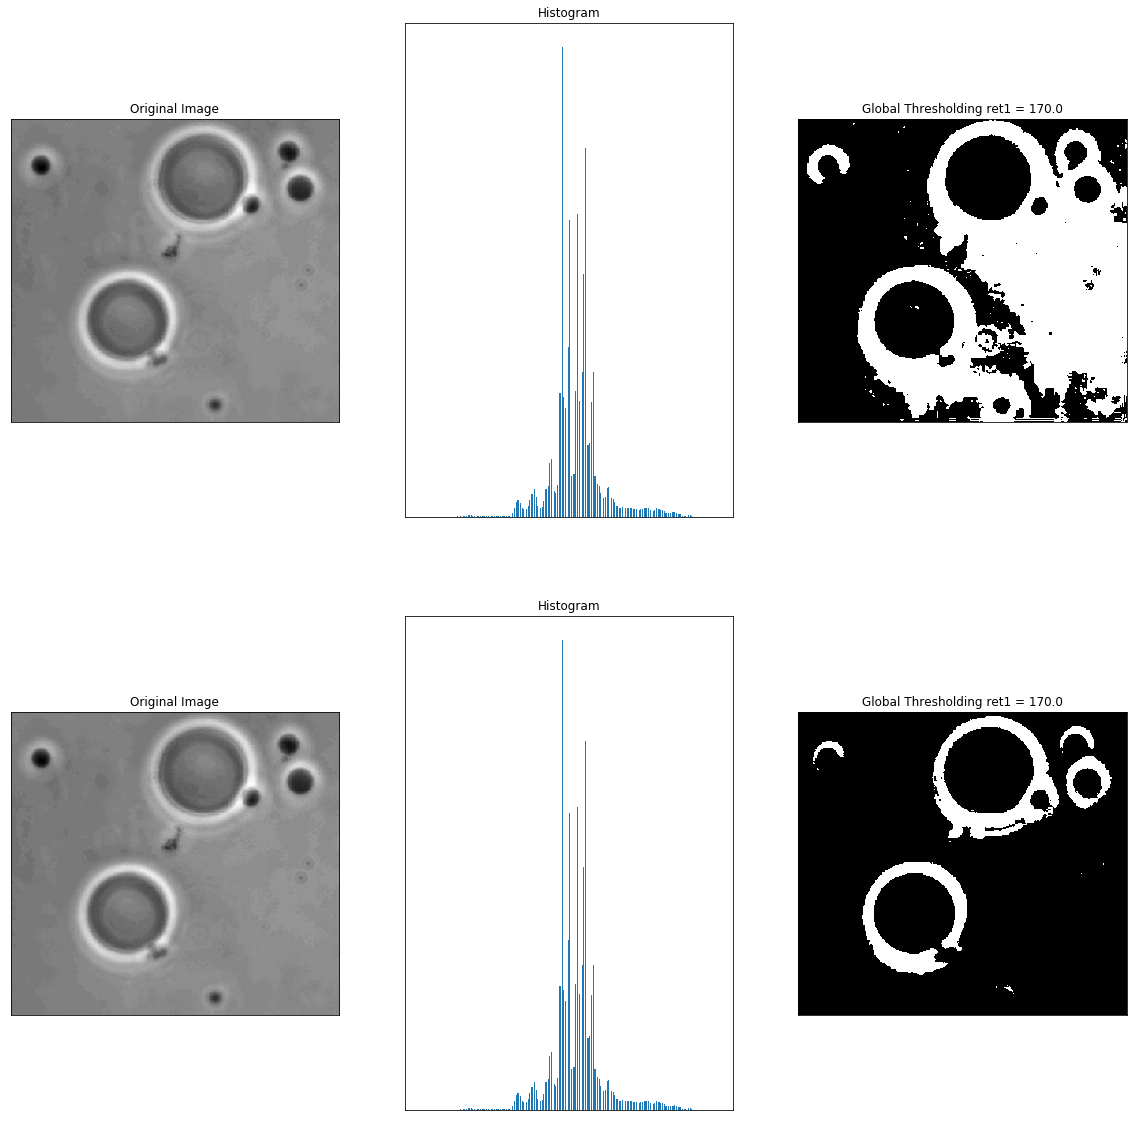

In [137]:
images = [img, 0, th1,
          img, 0, th2,]
titles = ['Original Image','Histogram','Global Thresholding' + ' ret1 = ' + str(ret1),
          'Original Image','Histogram',"Otsu's Thresholding" + ' ret2 = ' + str(ret2)]
plt.figure(figsize=(20,20))

plt.subplot(231),plt.imshow(img,'gray')
plt.title(titles[0]), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.hist(img.ravel(),256)
plt.title(titles[1]), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(th1,'gray')
plt.title(titles[2]), plt.xticks([]), plt.yticks([])

plt.subplot(234),plt.imshow(img,'gray')
plt.title(titles[0]), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.hist(img.ravel(),256)
plt.title(titles[1]), plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(th2,'gray')
plt.title(titles[2]), plt.xticks([]), plt.yticks([])

plt.show()

<h4>Another example</h4>

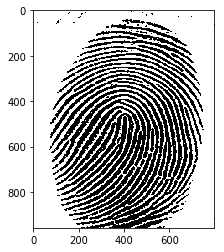

In [138]:
ret,thr = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thr, cmap = 'gray'); plt.show();

<h2>4. Adaptive Thresholding</h2>

In the previous section, we used a global value as threshold value. But it may not be good in all the conditions where image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions of the same image and it gives us better results for images with varying illumination.

<h3>Read sample image</h3>

In [143]:
img = cv2.imread('./examples/Fig1050a.tif',0)

<h4>Thresholding</h4>

In [144]:
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

<h4>Plot all the images</h4>

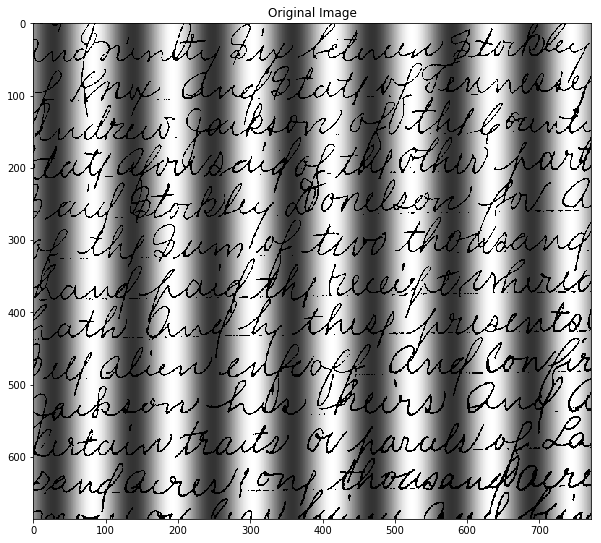

In [145]:
plt.figure(figsize=(10,10))
plt.imshow(img, cmap = 'gray'); plt.title('Original Image'); plt.show();

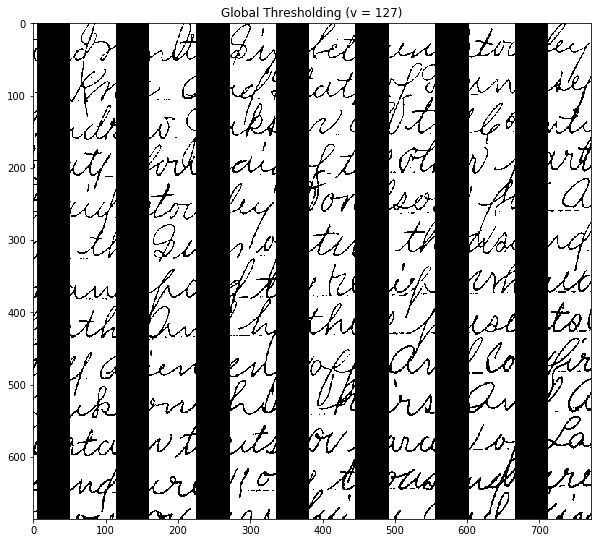

In [146]:
plt.figure(figsize=(10,10))
plt.imshow(th1, cmap = 'gray'); plt.title('Global Thresholding (v = 127)'); plt.show();

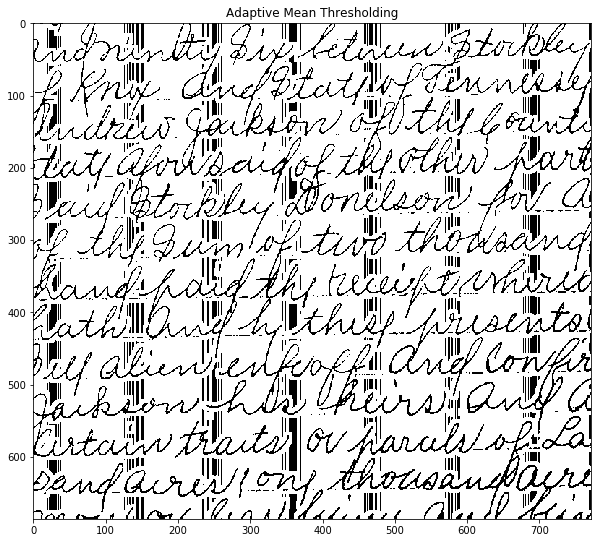

In [147]:
plt.figure(figsize=(10,10))
plt.imshow(th2, cmap = 'gray'); plt.title('Adaptive Mean Thresholding'); plt.show();

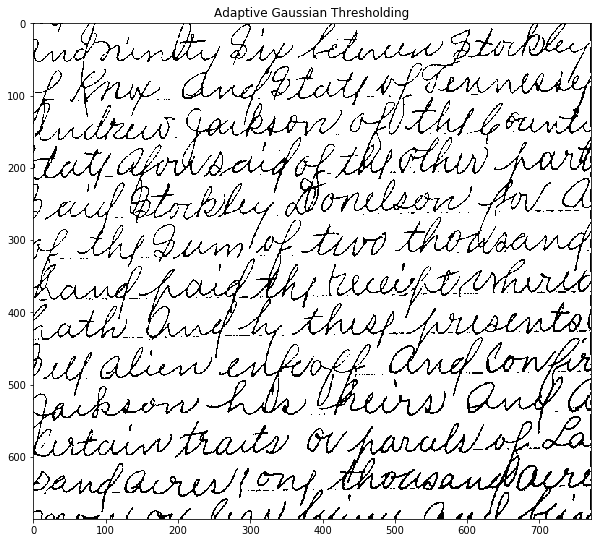

In [148]:
plt.figure(figsize=(10,10))
plt.imshow(th3, cmap = 'gray'); plt.title('Adaptive Gaussian Thresholding'); plt.show();